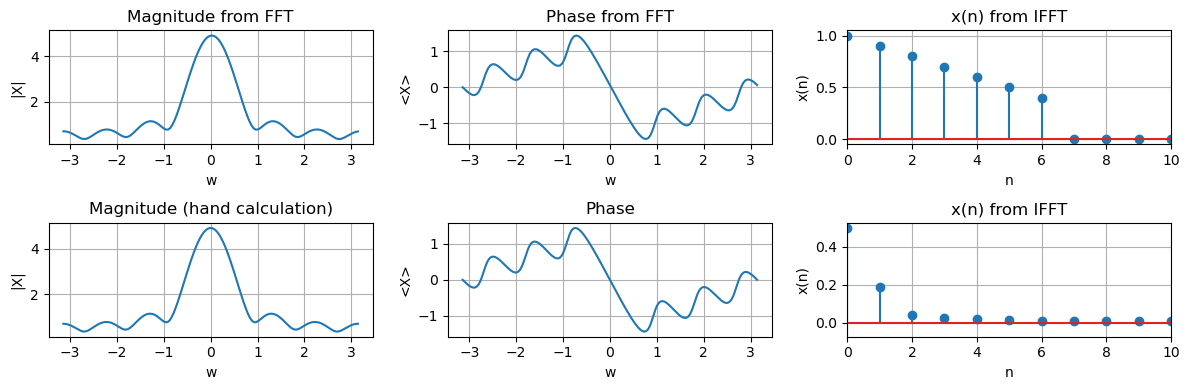

In [42]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
N = 128
n = np.arange(N)
xn = np.concatenate((x, np.zeros(N - len(x))))
X = np.fft.fft(xn)
w = np.linspace(-np.pi, np.pi, N)

plt.figure(figsize=(12, 4))

plt.subplot(231)
plt.plot(w, np.fft.fftshift(np.abs(X)))
plt.title('Magnitude from FFT')
plt.xlabel('w')
plt.ylabel('|X|')
plt.grid()

plt.subplot(232)
plt.plot(w, np.fft.fftshift(np.angle(X)))
plt.title('Phase from FFT')
plt.xlabel('w')
plt.ylabel('<X>')
plt.grid()

# IFFT
xn = np.fft.ifft(X,N)
plt.subplot(233)
plt.stem(n, xn.real)
plt.title('x(n) from IFFT')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid()
plt.xlim([0, 10])

# Hand-calculated DTFT
w = np.linspace(-np.pi, np.pi, 1000)
Xjw = 1 + (0.9*np.exp(-1j*w) + 0.8*np.exp(-2j*w) + 0.7*np.exp(-3j*w) + 0.6*np.exp(-4j*w) + 0.5*np.exp(-5j*w) + 0.4*np.exp(-6j*w))
plt.subplot(234)
plt.plot(w, np.abs(Xjw))
plt.title('Magnitude (hand calculation)')
plt.xlabel('w')
plt.ylabel('|X|')
plt.grid()

plt.subplot(235)
plt.plot(w, np.angle(Xjw))
plt.title('Phase')
plt.xlabel('w')
plt.ylabel('<X>')
plt.grid()

# IFFT
y = np.fft.ifft(Xjw, N)
plt.subplot(236)
plt.stem(n,y.real)
plt.title('x(n) from IFFT')
plt.xlabel('n')
plt.ylabel('x(n)')
plt.grid()
plt.xlim([0, 10])

plt.tight_layout()
plt.show()


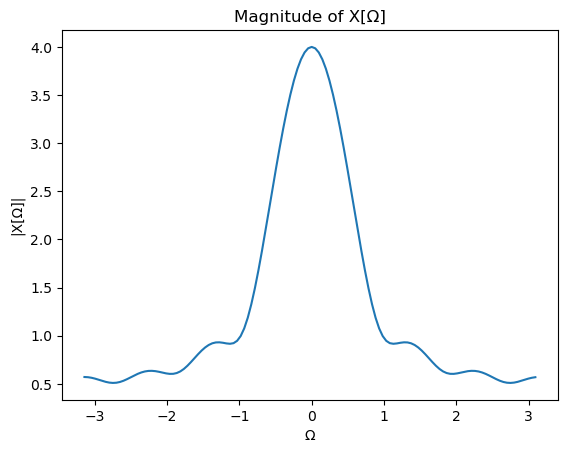

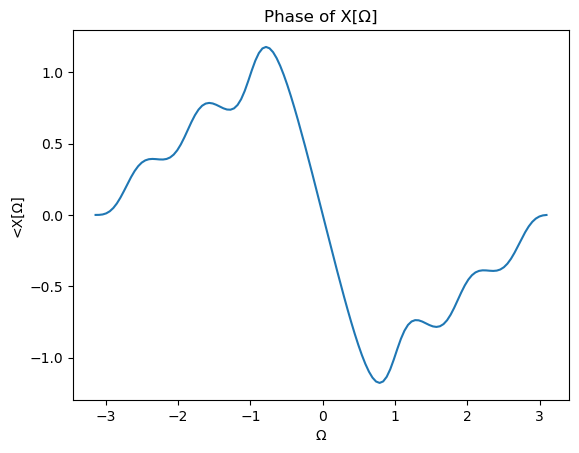

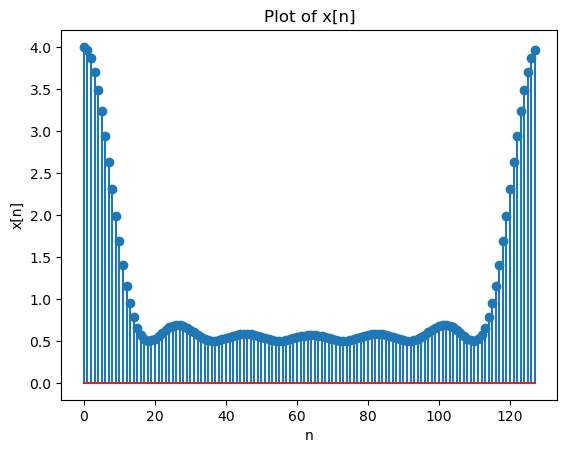

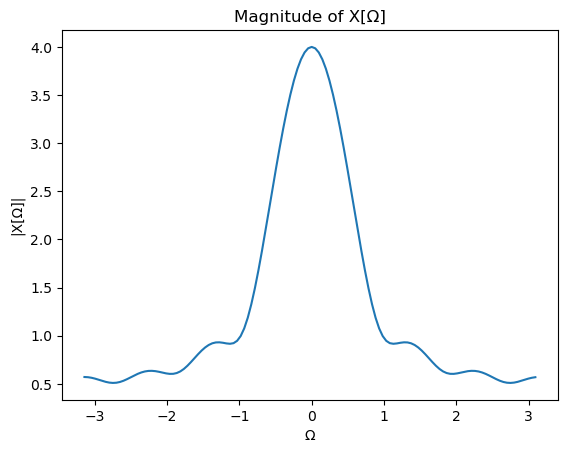

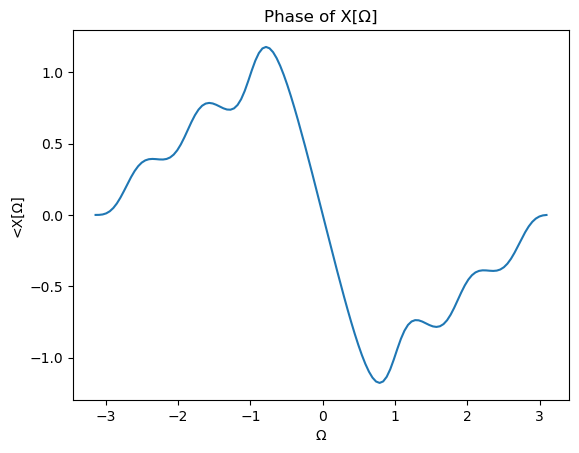

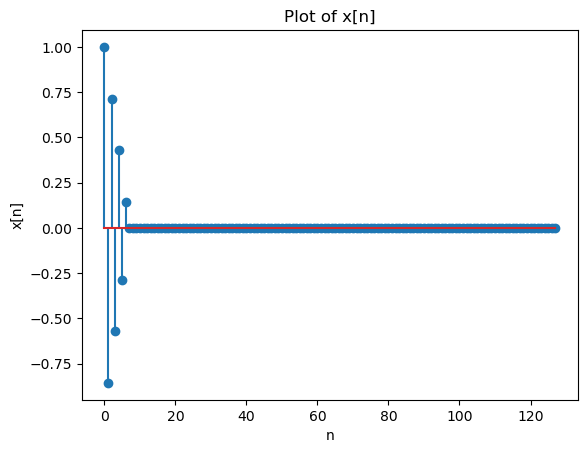

In [70]:
import numpy as np
import matplotlib.pyplot as plt

N0 = 128
n = np.arange(N0)
ohm = (2*np.pi/128)*np.arange(-64, 64)

x = np.concatenate(([1, 6/7, 5/7, 4/7, 3/7, 2/7, 1/7], np.zeros(121)))
X = np.fft.fft(x)

plt.plot(ohm, np.fft.fftshift(np.abs(X)))
plt.title('Magnitude of X[Ω]')
plt.xlabel('Ω')
plt.ylabel('|X[Ω]|')
plt.show()

plt.plot(ohm, np.fft.fftshift(np.angle(X)))
plt.title('Phase of X[Ω]')
plt.xlabel('Ω')
plt.ylabel('<X[Ω]')
plt.show()

plt.stem(n, X.real)
plt.title('Plot of x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

X_hand = 1 + (6/7)*np.exp(-1j*ohm) \
    + (5/7)*np.exp(-1j*2*ohm) \
    + (4/7)*np.exp(-1j*3*ohm) \
    + (3/7)*np.exp(-1j*4*ohm) \
    + (2/7)*np.exp(-1j*5*ohm) \
    + (1/7)*np.exp(-1j*6*ohm)

plt.plot(ohm, np.abs(X_hand))
plt.title('Magnitude of X[Ω]')
plt.xlabel('Ω')
plt.ylabel('|X[Ω]|')
plt.show()

plt.plot(ohm, np.angle(X_hand))
plt.title('Phase of X[Ω]')
plt.xlabel('Ω')
plt.ylabel('<X[Ω]')
plt.show()

x_hand = np.fft.ifft(X_hand)

plt.stem(n, x_hand.real)
plt.title('Plot of x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()


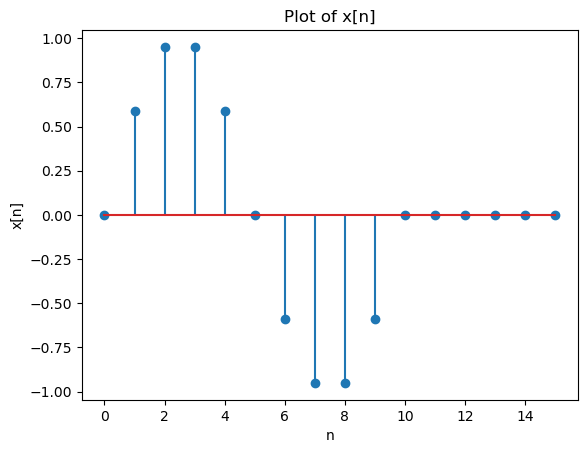

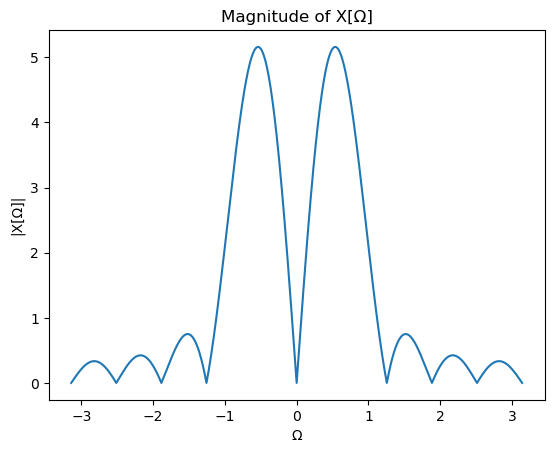

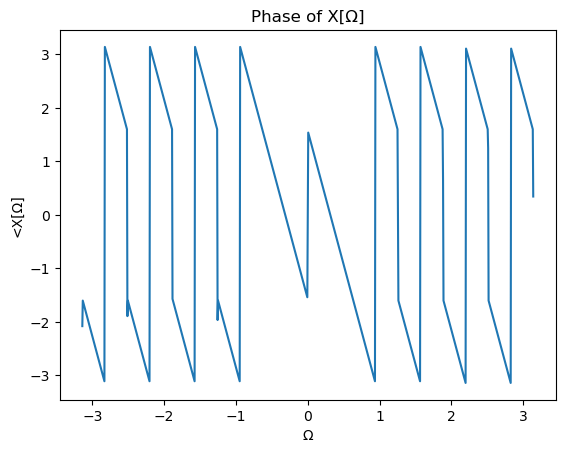

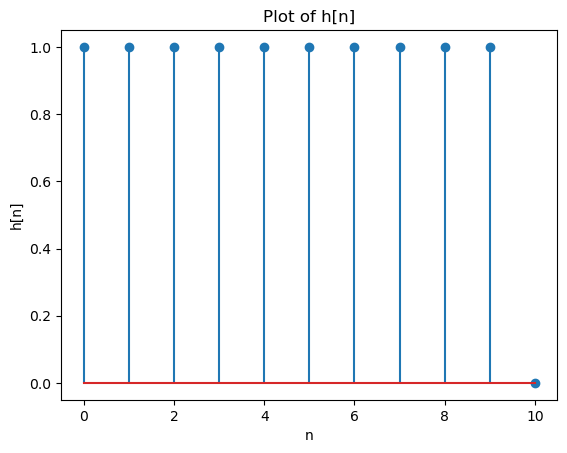

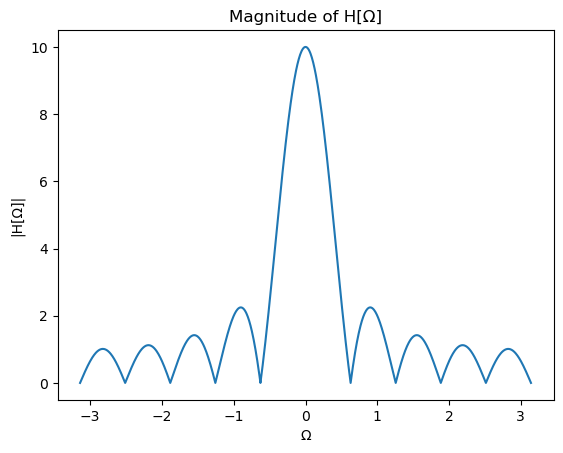

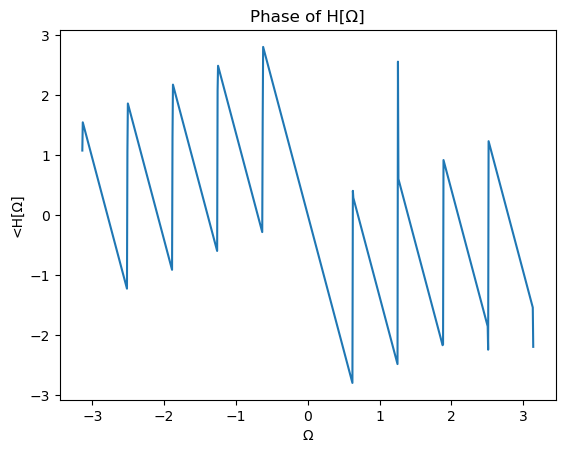

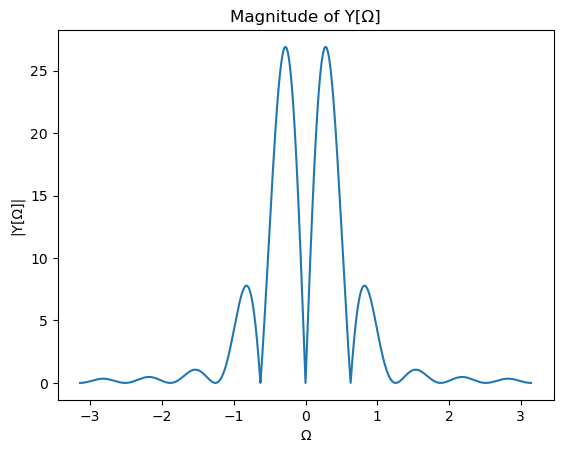

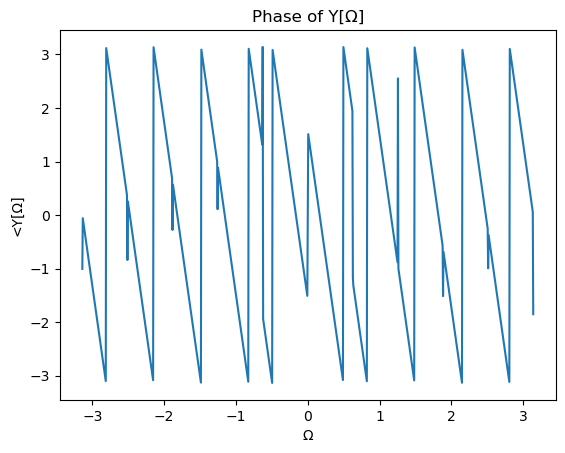

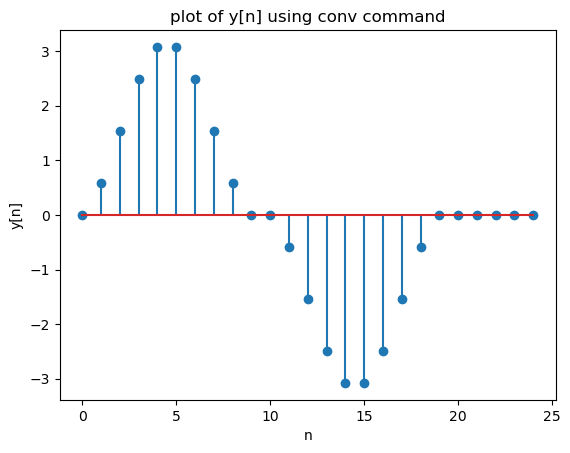

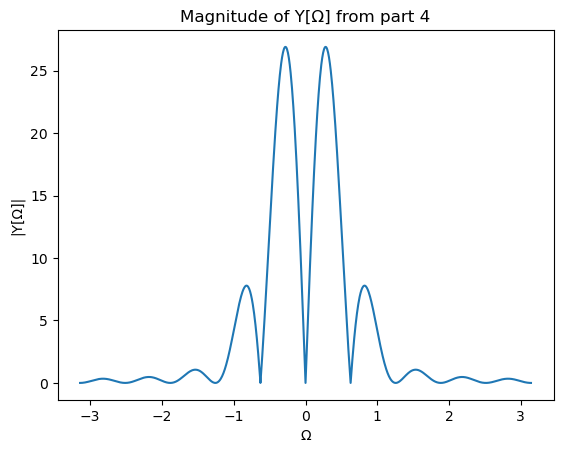

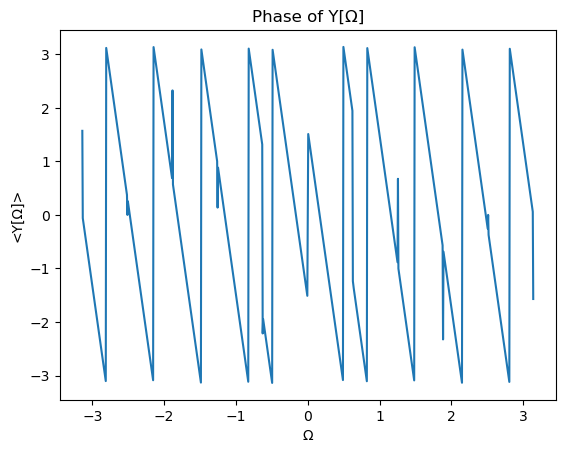

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1 - DTFT plot of x[n]
n = np.arange(16)
u_c = lambda t: 1.0 * (t >= 0)
u = lambda n: u_c(n) * (np.mod(n, 1) == 0)
x = np.sin(2 * np.pi * n / 10) * (u(n) - u(n - 10))

omega = np.linspace(-np.pi, np.pi, 1001)
W_omega = np.exp(-1j) ** (np.arange(len(x)).reshape(-1, 1) * omega)
X = np.dot(x, W_omega)

plt.stem(n, x)
plt.title('Plot of x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.show()

plt.plot(omega, abs(X))
plt.title('Magnitude of X[Ω]')
plt.xlabel('Ω')
plt.ylabel('|X[Ω]|')
plt.show()

plt.plot(omega, np.angle(X))
plt.title('Phase of X[Ω]')
plt.xlabel('Ω')
plt.ylabel('<X[Ω]')
plt.show()


# Part 2 - DTFT plot of h[n]
n = np.arange(10)
x = u(n) - u(n - 10)

W_omega = np.exp(-1j) ** (np.arange(len(x)).reshape(-1, 1) * omega)
H = np.dot(x, W_omega)

plt.stem(n, x)
plt.title('Plot of h[n]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()

plt.plot(omega, abs(H))
plt.title('Magnitude of H[Ω]')
plt.xlabel('Ω')
plt.ylabel('|H[Ω]|')
plt.show()

plt.plot(omega, np.angle(H))
plt.title('Phase of H[Ω]')
plt.xlabel('Ω')
plt.ylabel('<H[Ω]')
plt.show()


# Part 3 - Convolution Plot of X[Ω] and H[Ω]
Y = X * H

plt.plot(omega, abs(Y))
plt.title('Magnitude of Y[Ω]')
plt.xlabel('Ω')
plt.ylabel('|Y[Ω]|')
plt.show()

plt.plot(omega, np.angle(Y))
plt.title('Phase of Y[Ω]')
plt.xlabel('Ω')
plt.ylabel('<Y[Ω]')
plt.show()


# Part 4 - Convolution Plot of x[n] and h[n] by conv command
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(16)
u_c = lambda t: 1.0*(t>=0)
u = lambda n: u_c(n)*(np.mod(n,1)==0)

h = u(np.arange(10))
x = np.sin(2*np.pi*n/10)*(u(n) - u(n-10))
n = np.arange(25)

y = np.convolve(x, h)

plt.stem(n, y)
plt.title('plot of y[n] using conv command')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

# Part 5 - DTFT Plot of y[n] from Part 4

omega = np.linspace(-np.pi,np.pi,1001)
W_omega = np.exp(-1j*np.arange(len(y))[:,None]*omega)
Y = np.dot(y, W_omega)

plt.plot(omega, np.abs(Y))
plt.title('Magnitude of Y[Ω] from part 4')
plt.xlabel('Ω')
plt.ylabel('|Y[Ω]|')
plt.show()

plt.plot(omega, np.angle(Y))
plt.title('Phase of Y[Ω]')
plt.xlabel('Ω')
plt.ylabel('<Y[Ω]>')
plt.show()



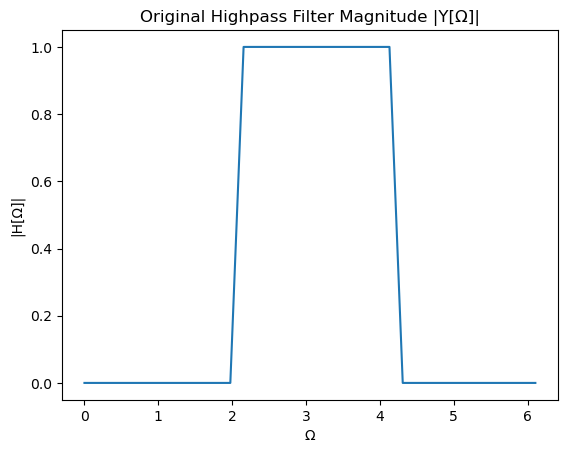

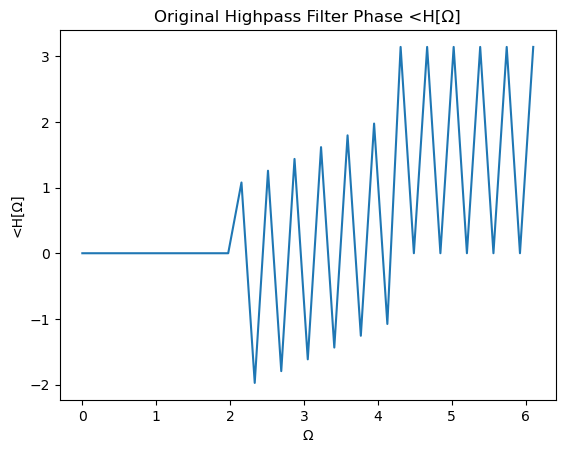

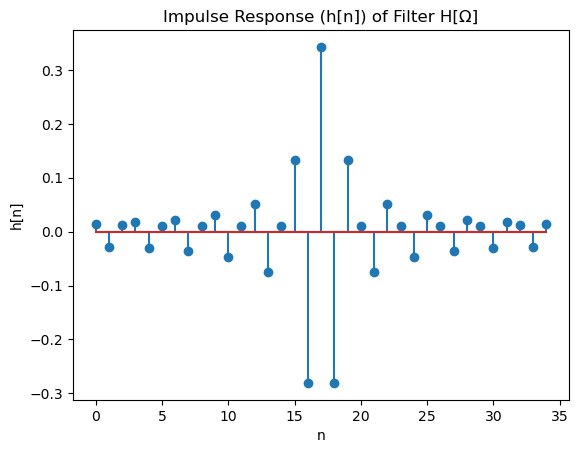

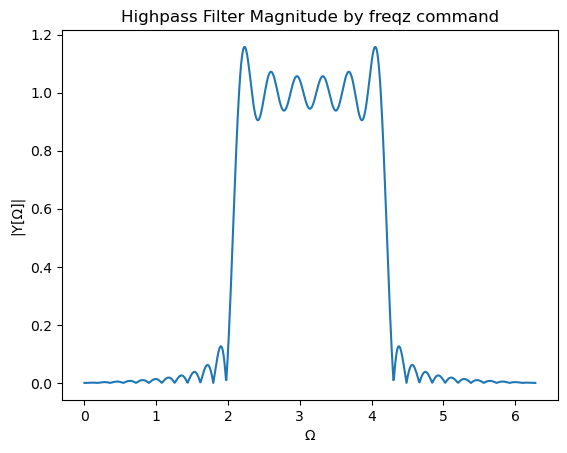

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

ohm0 = 2*np.pi/3
N = 35
n = np.arange(N)
Omega = np.linspace(0, 2*np.pi*(1-1/N), N)
H_d = lambda Omega: (np.mod(Omega, 2*np.pi) > ohm0) * (np.mod(Omega, 2*np.pi) < 2*np.pi - ohm0)

H = H_d(Omega) * np.exp(-1j * Omega * ((N-1)/2))
h = np.fft.ifft(H)

plt.plot(Omega, abs(H))
plt.title('Original Highpass Filter Magnitude |Y[Ω]|')
plt.xlabel('Ω')
plt.ylabel('|H[Ω]|')
plt.show()

plt.plot(Omega, np.angle(H))
plt.title('Original Highpass Filter Phase <H[Ω]')
plt.xlabel('Ω')
plt.ylabel('<H[Ω]')
plt.show()

plt.stem(n, h)
plt.title('Impulse Response (h[n]) of Filter H[Ω]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()


w, H = freqz(h, 1, np.linspace(0, 2*np.pi, 1002))
plt.plot(w, abs(H))
plt.title('Highpass Filter Magnitude by freqz command')
plt.xlabel('Ω')
plt.ylabel('|Y[Ω]|')
plt.show()



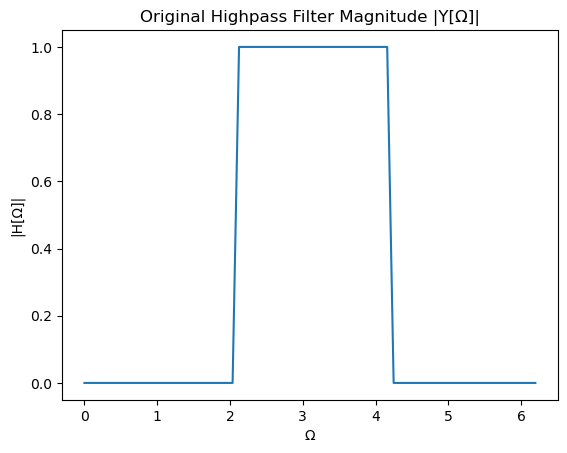

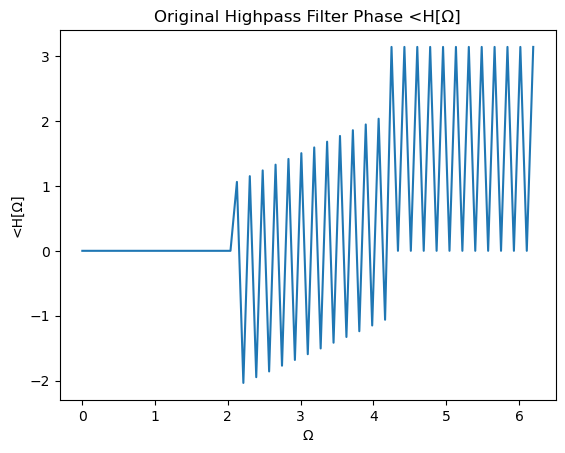

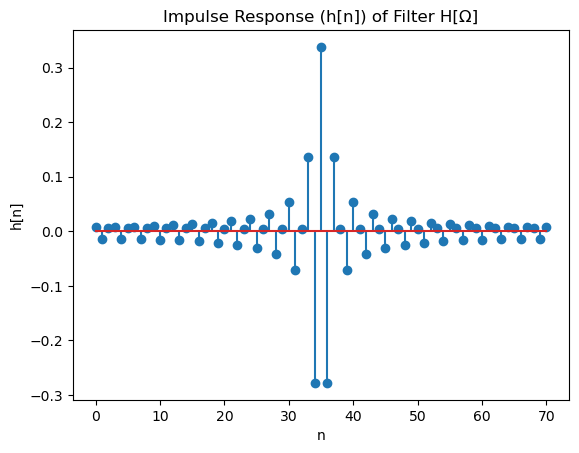

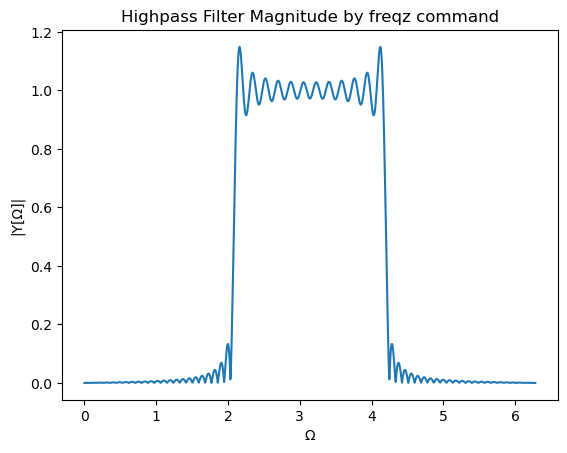

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

ohm0 = 2*np.pi/3
N = 71
n = np.arange(N)
Omega = np.linspace(0, 2*np.pi*(1-1/N), N)
H_d = lambda Omega: (np.mod(Omega, 2*np.pi) > ohm0) * (np.mod(Omega, 2*np.pi) < 2*np.pi - ohm0)

H = H_d(Omega) * np.exp(-1j * Omega * ((N-1)/2))
h = np.fft.ifft(H)

plt.plot(Omega, abs(H))
plt.title('Original Highpass Filter Magnitude |Y[Ω]|')
plt.xlabel('Ω')
plt.ylabel('|H[Ω]|')
plt.show()

plt.plot(Omega, np.angle(H))
plt.title('Original Highpass Filter Phase <H[Ω]')
plt.xlabel('Ω')
plt.ylabel('<H[Ω]')
plt.show()

plt.stem(n, h)
plt.title('Impulse Response (h[n]) of Filter H[Ω]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.show()


w, H = freqz(h, 1, np.linspace(0, 2*np.pi, 1002))
plt.plot(w, abs(H))
plt.title('Highpass Filter Magnitude by freqz command')
plt.xlabel('Ω')
plt.ylabel('|Y[Ω]|')
plt.show()

